# Fit a Decision Tree Model using Scikit-Learn for wine dataset

The wine dataset is one of the datasets scikit-learn comes with that do not require the downloading of any file from some external website. The code below loads the iris dataset. https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html

In [1]:
import pandas as pd
from sklearn.datasets import load_wine
data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [5]:
df.target.unique()

array([0, 1, 2])

## Q1. Build a Decision Tree Classifier model with max_depth = 5, random_state=100 for wine dataset

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [4]:
#Create x and y variables
x = df.drop('target', axis=1).to_numpy()
y = df['target'].to_numpy()

#Create Train and Test Datasets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20,stratify=y,random_state=100)

#Scale the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train2 = sc.fit_transform(x_train)
x_test2 = sc.transform(x_test)

x_2 = sc.fit_transform(x)

clf_tree = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=100)
clf_tree.fit(x_train2, y_train)

DecisionTreeClassifier(max_depth=5, random_state=100)

## Q2. Visualize the constructed Decision Trees using Matplotlib

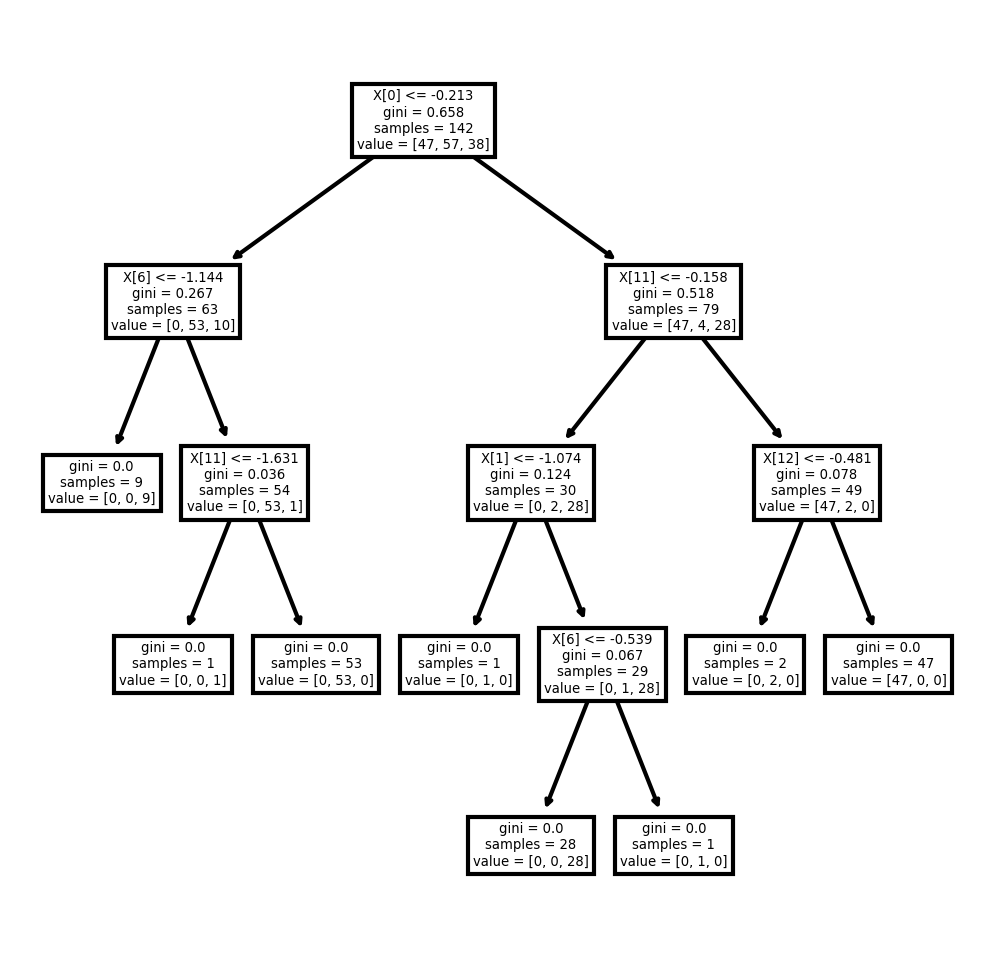

In [8]:
from sklearn import tree
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)
tree.plot_tree(clf_tree);
fig.savefig('1.png')

In [9]:
# Putting the feature names and class names into variables
fn = ['alcohol','malic_acid','ash','alcalinity_of_ash','magnesium','total_phenols','flavanoids','nonflavanoid_phenols','proanthocyanins','color_intensity','hue','od280/od315_of_diluted_wines','proline']
cn = ['0', '1', '2']

In [21]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (20,5), dpi = 1000)

tree.plot_tree(clf_tree,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('2.png')

## Q3. Report the Confusion Matrix of the constructed Decison Tree

In [22]:
from sklearn import metrics
ypred = clf_tree.predict(x_test2)
cm = metrics.confusion_matrix(ypred, y_test)
print(cm)

[[12  1  0]
 [ 0 12  2]
 [ 0  1  8]]


In [23]:
score=metrics.accuracy_score(ypred, y_test)
print(score)

0.8888888888888888


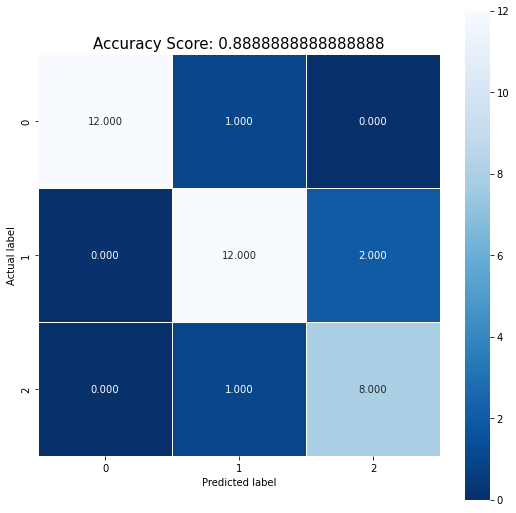

In [24]:
import seaborn as sns
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);